<a href="https://colab.research.google.com/github/MarcellinaFransisca/HWEDA-Kelompok8A/blob/main/hw_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 7
rcParams['lines.linewidth'] = 4
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [ ]:
data = pd.read_csv('Churn_Modelling.csv')


##  1. Descriptive Statistics

##### A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai?

###### Dengan data.info() kita bisa melihat apakah ada kolom dengan tipe data kurang sesusi atau tidak dan Dengan data.head() kita bisa melihat apakah ada nama kolom dan isinya kurang sesuai, dengan begitu dari data tersebut sudah aman sudah sesuai maka...

    A: “Semua tipe data sudah sesuai”

##### B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?

###### Dengan data.info() kita bisa membandingkan jumlah kolom dan jumlah baris disni kita bisa lihat bahwa jumlahnya sudah sama yang berisi informasi tentang 10.000 pelanggan dari suatu bank, termasuk fitur-fitur seperti umur, jenis kelamin, saldo, produk, aktivitas, dll maka...

    B: “tidak ada nilai kosong”

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
data.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

#### C. Apakah ada kolom yang memiliki nilai summary agak aneh?
(min/mean/median/max/unique/top/freq)


In [ ]:
## pengelompokan kategori
cats = ['Surname', 'Geography', 'Gender']
nums = ['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']

In [ ]:
data[nums].describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

In [ ]:
data[cats].describe()

Surname Geography Gender
count    10000     10000  10000
unique    2932         3      2
top      Smith    France   Male
freq        32      5014   5457

In [ ]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## 2. Univariate Analysis

###### Gunakan visualisasi untuk melihat distribusi masing-masing kolom (feature maupun target). Tuliskan hasil observasinya, misalnya jika ada suatu kolom yang distribusinya menarik (misal skewed, bimodal, ada outlier, ada nilai yang mendominasi, kategorinya terlalu banyak, dsb). Jelaskan juga apa yang harus di-follow up saat data pre-processing.

### Distribution (Numeric)

In [ ]:
import plotly.express as px
import plotly.subplots as sp
import pandas as pd

data = pd.read_csv('Churn_Modelling.csv')

kolom_plot = ['CreditScore','Age', 'Tenure', 'Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Exited']
color = ['#cdc0b0','#F09EA7', '#F6CA94', '#C7CAFF','#89cff0','#ffe4c4','#ffff99','#C1EBC0','#eeeee0']

for index in range(len(kolom_plot)):
  px.histogram(
      data,
      x = kolom_plot[index],
      marginal = 'box',
      color_discrete_sequence  = [color[index]],
      title = 'Distribution of ' + kolom_plot[index]
  ).update_traces(
      marker_line_width = 1,
      marker_line_color = 'white'
  ).update_layout(
    plot_bgcolor = 'rgba(0, 0, 0, 0)'
  ).show()

### Distribusi (Categorical)

In [ ]:
import plotly.express as px
import pandas as pd

data = pd.read_csv('Churn_Modelling.csv')

data_surname = data.groupby(['Surname'],as_index =False).agg(total_surname = ('Surname',pd.Series.count))
fig = px.pie(data_surname, values= 'total_surname', names='Surname')
fig.show ()

In [ ]:
import plotly.express as px
import pandas as pd

data = pd.read_csv('Churn_Modelling.csv')

data_geography = data.groupby(['Geography'],as_index =False).agg(total_geography = ('Geography',pd.Series.count))
fig = px.pie(data_geography, values= 'total_geography', names='Geography')
fig.show ()

In [ ]:
import plotly.express as px
import pandas as pd

data = pd.read_csv('Churn_Modelling.csv')

data_gender = data.groupby(['Gender'],as_index =False).agg(total_gender = ('Gender',pd.Series.count))
fig = px.pie(data_gender, values= 'total_gender', names='Gender')
fig.show ()

## 3. Multivariate Analysis

#### Lakukan multivariate analysis (seperti correlation heatmap dan category plots, sesuai yang diajarkan di kelas). Tuliskan hasil observasinya, seperti:

A. Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana
saja yang paling relevan dan harus dipertahankan?

B. Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu
dilakukan terhadap feature itu?

* Tuliskan juga jika memang tidak ada feature yang saling berkorelasi

### Correlation Heatmap (Numeric)

In [ ]:
data.corr()

C:\Users\Putri\AppData\Local\Temp\ipykernel_15588\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


RowNumber  CustomerId  CreditScore       Age    Tenure  \
RowNumber         1.000000    0.004202     0.005840  0.000783 -0.006495   
CustomerId        0.004202    1.000000     0.005308  0.009497 -0.014883   
CreditScore       0.005840    0.005308     1.000000 -0.003965  0.000842   
Age               0.000783    0.009497    -0.003965  1.000000 -0.009997   
Tenure           -0.006495   -0.014883     0.000842 -0.009997  1.000000   
Balance          -0.009067   -0.012419     0.006268  0.028308 -0.012254   
NumOfProducts     0.007246    0.016972     0.012238 -0.030680  0.013444   
HasCrCard         0.000599   -0.014025    -0.005458 -0.011721  0.022583   
IsActiveMember    0.012044    0.001665     0.025651  0.085472 -0.028362   
EstimatedSalary  -0.005988    0.015271    -0.001384 -0.007201  0.007784   
Exited           -0.016571   -0.006248    -0.027094  0.285323 -0.014001   

                  Balance  NumOfProducts  HasCrCard  IsActiveMember  \
RowNumber       -0.009067       0.007246   0.000599        0.012044   
CustomerId      -0.012419       0.016972  -0.014025        0.001665   
CreditScore      0.006268       0.012238  -0.005458        0.025651   
Age              0.028308      -0.030680  -0.011721        0.085472   
Tenure          -0.012254       0.013444   0.022583       -0.028362   
Balance          1.000000      -0.304180  -0.014858       -0.010084   
NumOfProducts   -0.304180       1.000000   0.003183        0.009612   
HasCrCard       -0.014858       0.003183   1.000000       -0.011866   
IsActiveMember  -0.010084       0.009612  -0.011866        1.000000   
EstimatedSalary  0.012797       0.014204  -0.009933       -0.011421   
Exited           0.118533      -0.047820  -0.007138       -0.156128   

                 EstimatedSalary    Exited  
RowNumber              -0.005988 -0.016571  
CustomerId              0.015271 -0.006248  
CreditScore            -0.001384 -0.027094  
Age                    -0.007201  0.285323  
Tenure                  0.007784 -0.014001  
Balance                 0.012797  0.118533  
NumOfProducts           0.014204 -0.047820  
HasCrCard              -0.009933 -0.007138  
IsActiveMember         -0.011421 -0.156128  
EstimatedSalary         1.000000  0.012097  
Exited                  0.012097  1.000000

C:\Users\Putri\AppData\Local\Temp\ipykernel_15588\1543452717.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap='Blues', annot=True, fmt='.2f')


<Axes: >

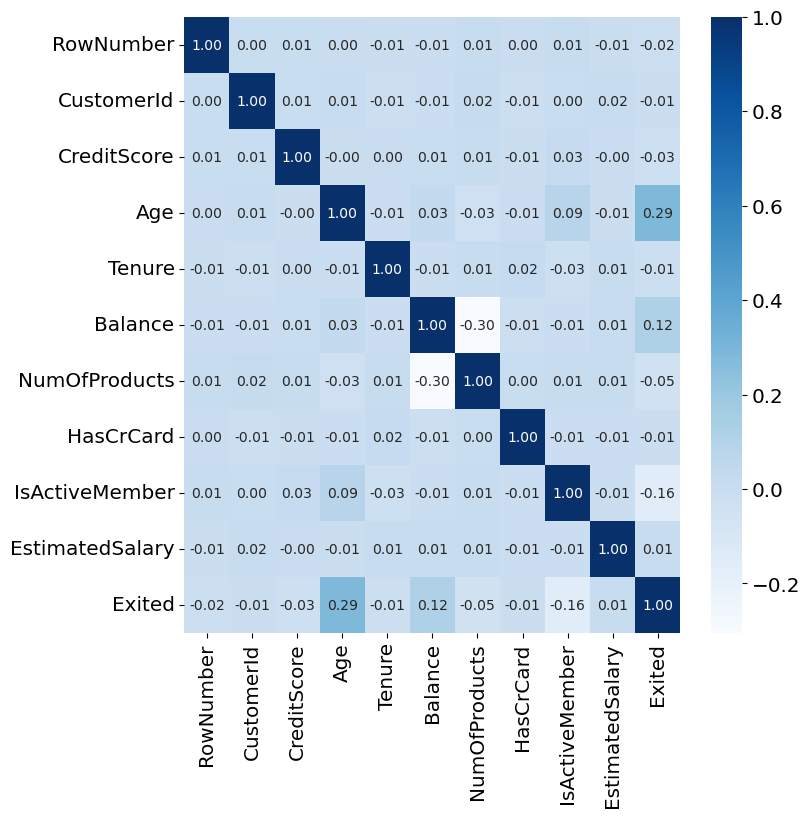

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(data.corr(), cmap='Blues', annot=True, fmt='.2f')

     Yang perlu diperhatikan:
● Apakah feature memiliki
korelasi dengan target?
Bila tidak, maka model linear
tidak dapat digunakan

● Apakah ada 2 feature yang
berkorelasi kuat (>0.7)?
Bila ya, ada kemungkinan
besar kedua feature tersebut
redundan

### Pair Plots (Numeric)

<Figure size 1500x1500 with 0 Axes>

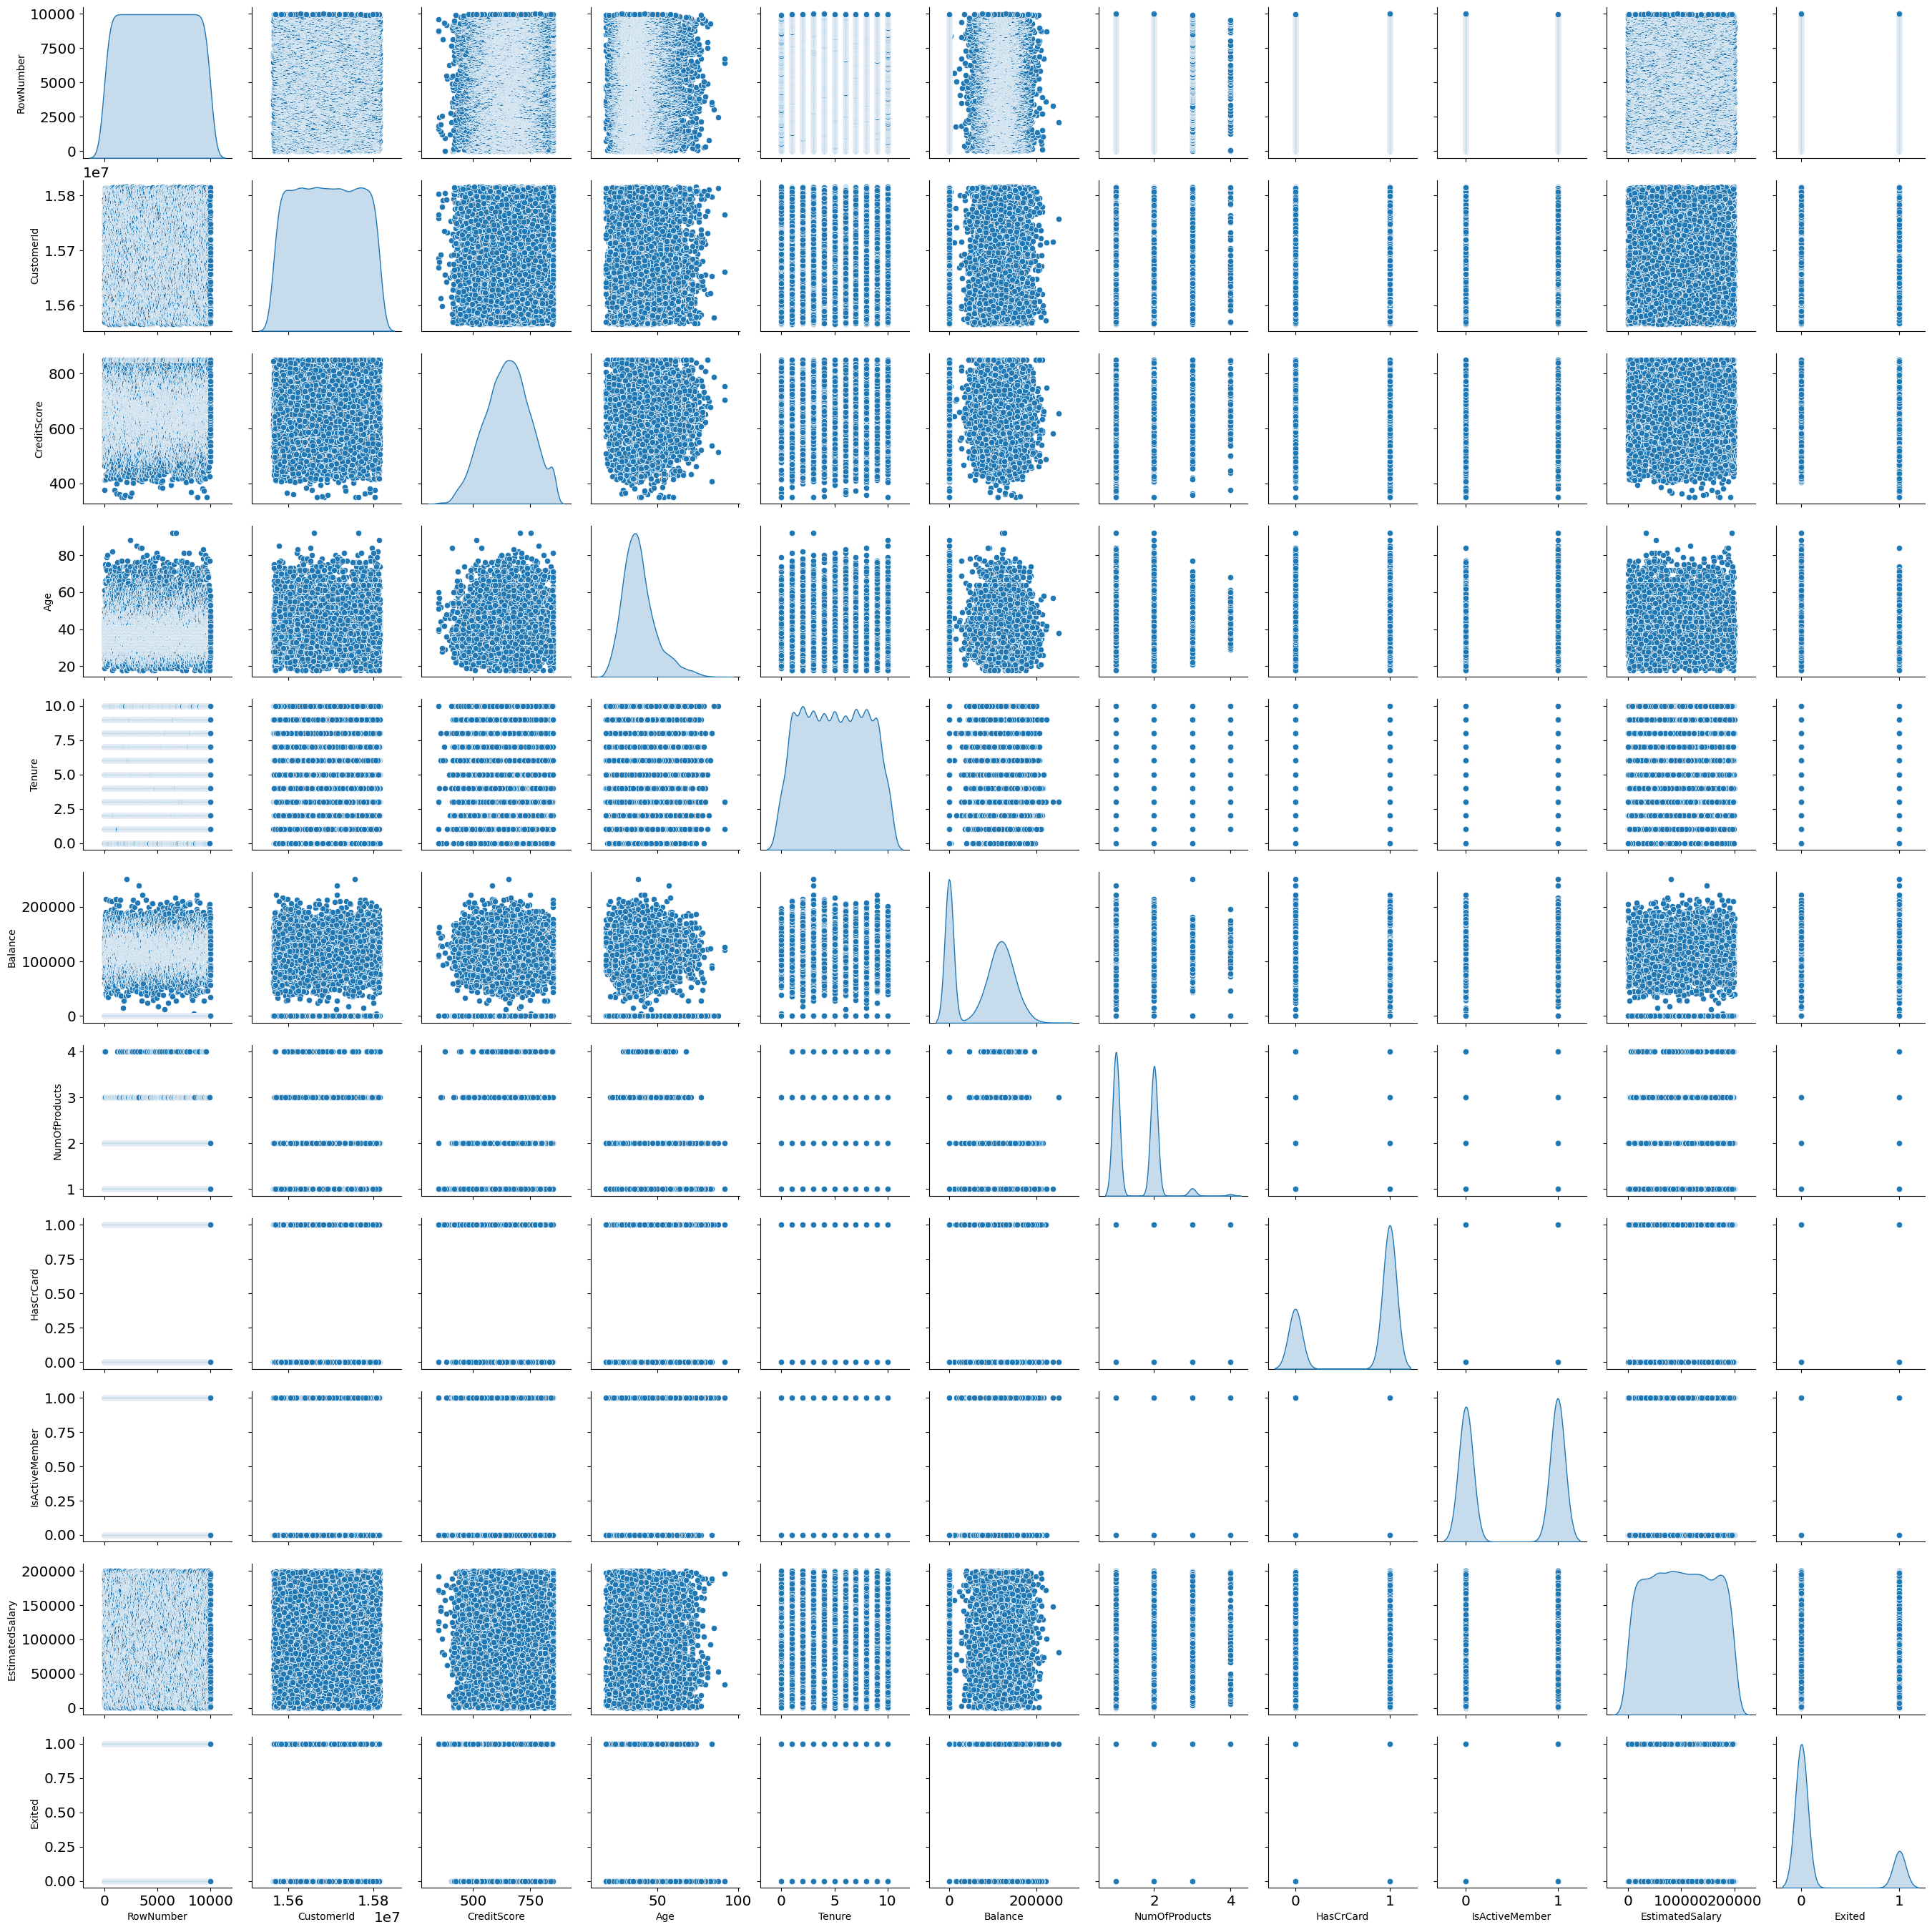

In [ ]:
plt.figure(figsize=(15, 15))
sns.pairplot(data, diag_kind='kde')

    Yang perlu diperhatikan:
● Apakah ada scatter plot yang
menunjukkan
cluster/pattern yang cukup
jelas?
Pola pada scatter plot bisa
menjadi petunjuk untuk
memilih fitur yang baik

#### Pair Plots + Hue (Numeric)

KeyError: ignored

<Figure size 1500x1500 with 0 Axes>

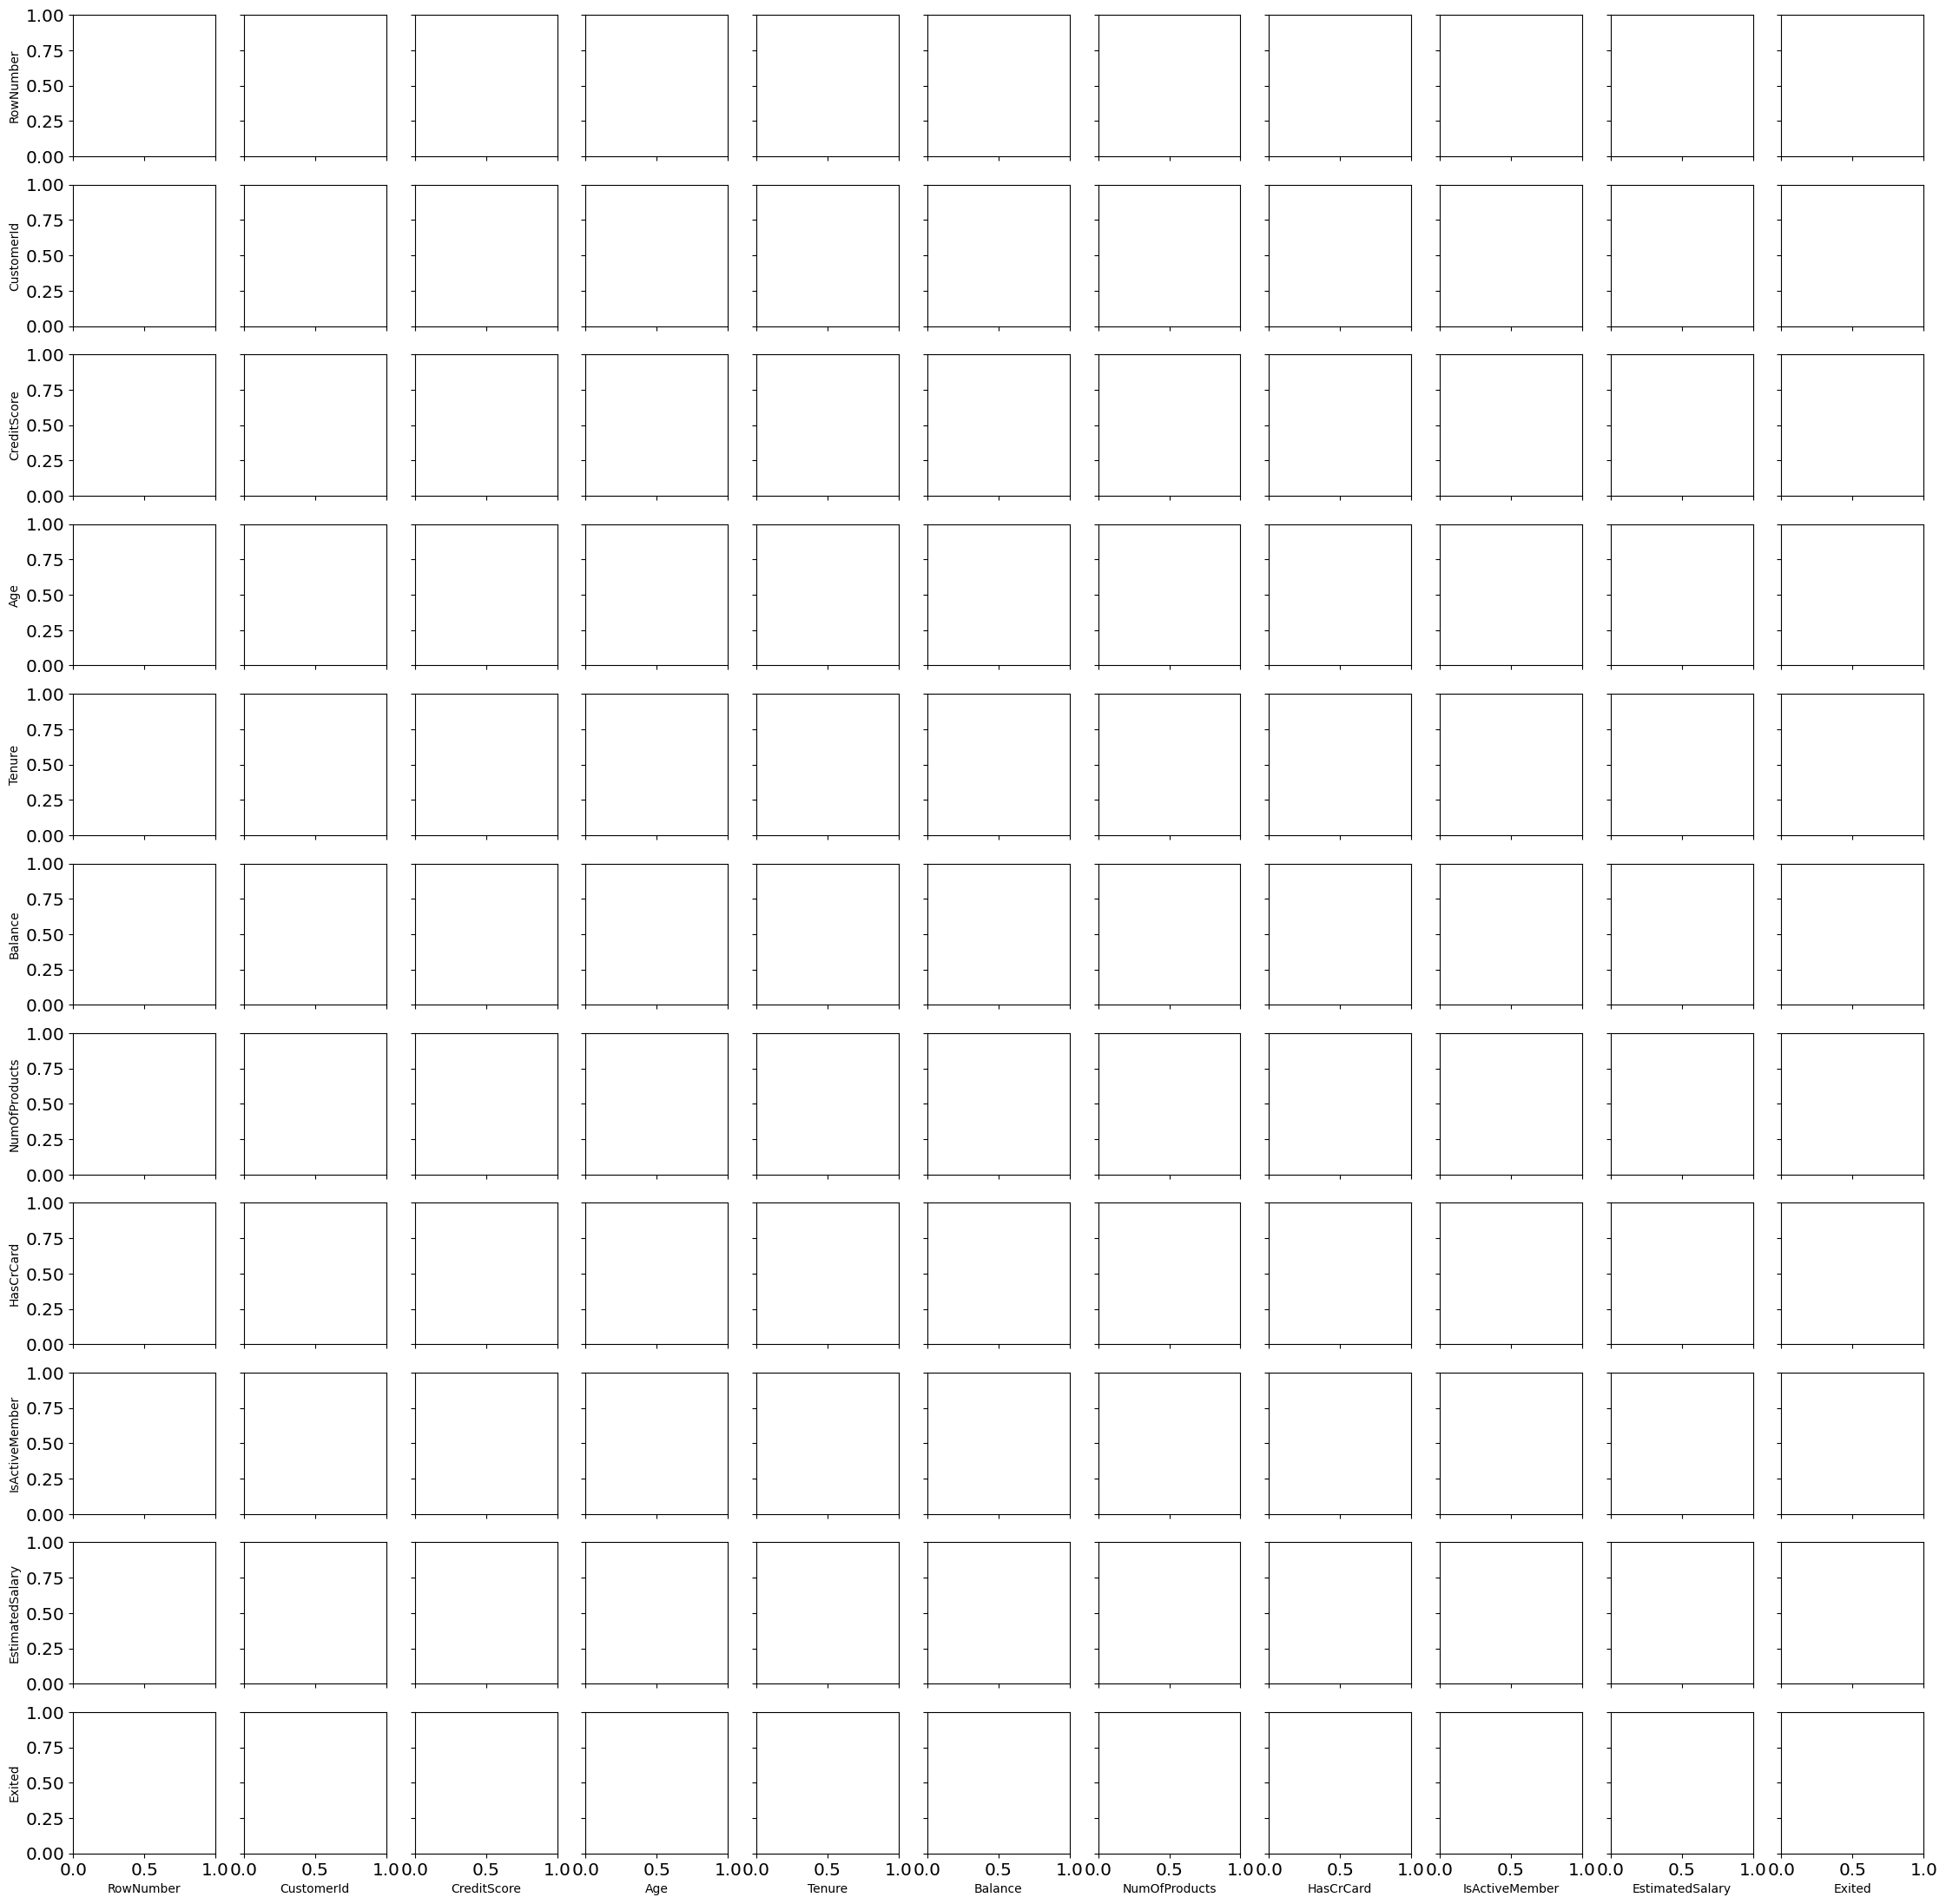

In [ ]:
plt.figure(figsize=(15, 15))
sns.pairplot(data, diag_kind='kde',
            hue = 'Survived')


       Yang perlu diperhatikan:

● Apakah ada scatter plot
dimana kedua warna
terpisah dengan baik?
Scatter plot dimana target
terpisah dapat menjadi
indikasi kombinasi fitur yang
baik

### Category Plots (Categorical - Numeric)

##### yang category plots aku masih ragu karena disini harus hibungin category dan numeric ada 3 cats dan 11 nums jadi 33 grafik yang harus dibuat satu satu


## 4. Business Insight

##### Selain EDA, lakukan juga beberapa analisis dan visualisasi untuk menemukan suatu business insight. Tuliskan minimal 3 insight, dan berdasarkan insight tersebut jelaskan rekomendasinya untuk bisnis.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('Churn_Modelling.csv')

# Insight 1: Visualisasi tingkat churn pada grup usia

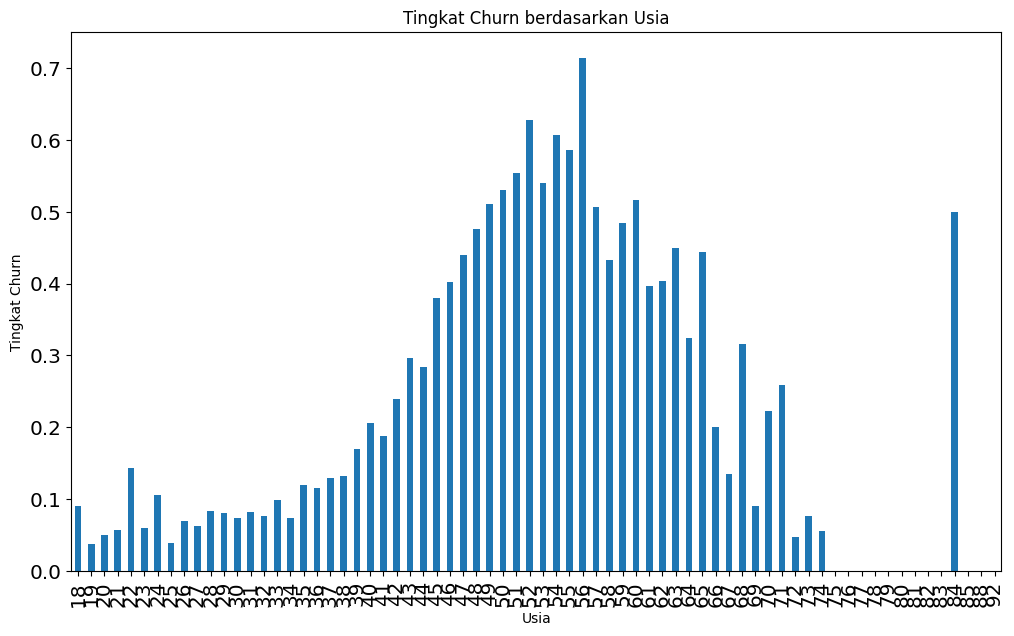

In [ ]:
age_churn = data.groupby('Age')['Exited'].mean()
age_churn.plot(kind='bar')
plt.title('Tingkat Churn berdasarkan Usia')
plt.xlabel('Usia')
plt.ylabel('Tingkat Churn')
plt.show()


# Insight 2: Visualisasi hubungan saldo rata-rata dengan churn

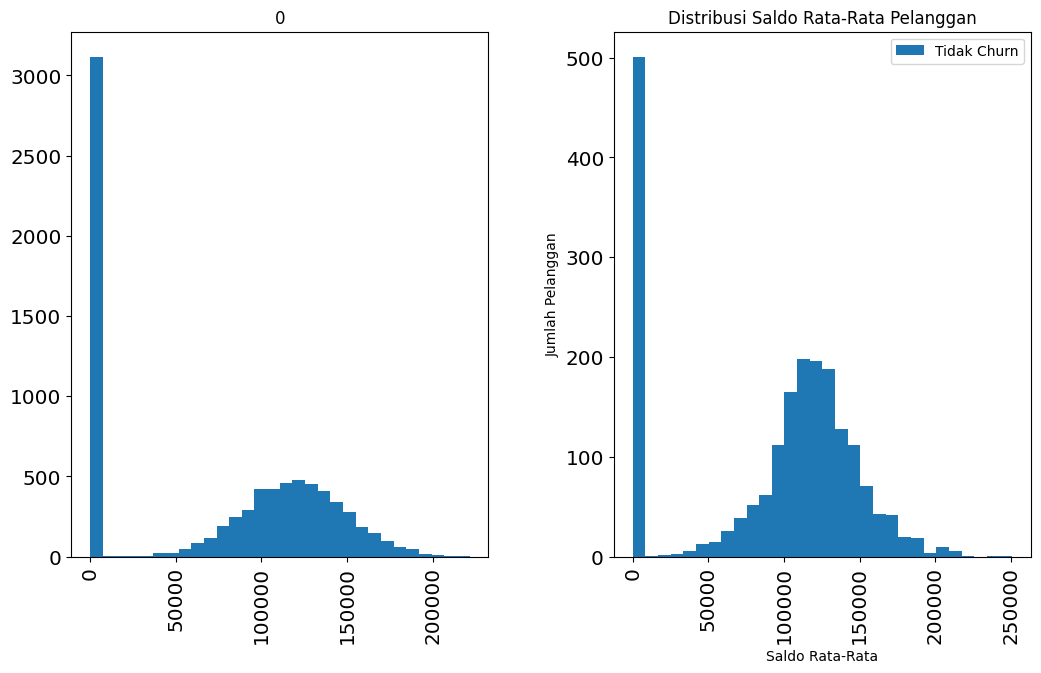

In [ ]:
data['Balance'].hist(by=data['Exited'], bins=30)
plt.title('Distribusi Saldo Rata-Rata Pelanggan')
plt.xlabel('Saldo Rata-Rata')
plt.ylabel('Jumlah Pelanggan')
plt.legend(['Tidak Churn', 'Churn'])
plt.show()

# Insight 3: Visualisasi hubungan antara tenure dan churn

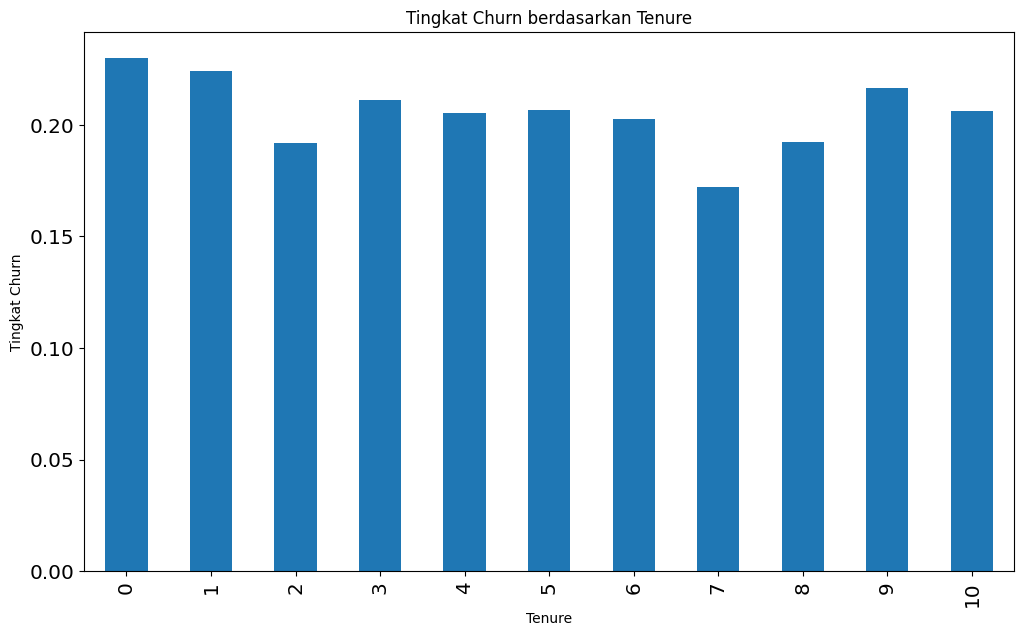

In [ ]:
feedback_churn = data.groupby('Tenure')['Exited'].mean()
feedback_churn.plot(kind='bar')
plt.title('Tingkat Churn berdasarkan Tenure')
plt.xlabel('Tenure')
plt.ylabel('Tingkat Churn')
plt.show()